## Define preprocessing constants

In [1]:
INPUT_FILE = "../data/original/data.csv"
OUTPUT_FILE = "../data/preprocessed/preprocessed_data.csv"

LEAVE_OUT_TRESHOLD = 50
OUTLIER_CUT_PERCENTAGE = 0.25
REMOVE_FEATURES = False

## Let's start by loading necessary useful libraries

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Next up original data will be loaded and presented in normalized form

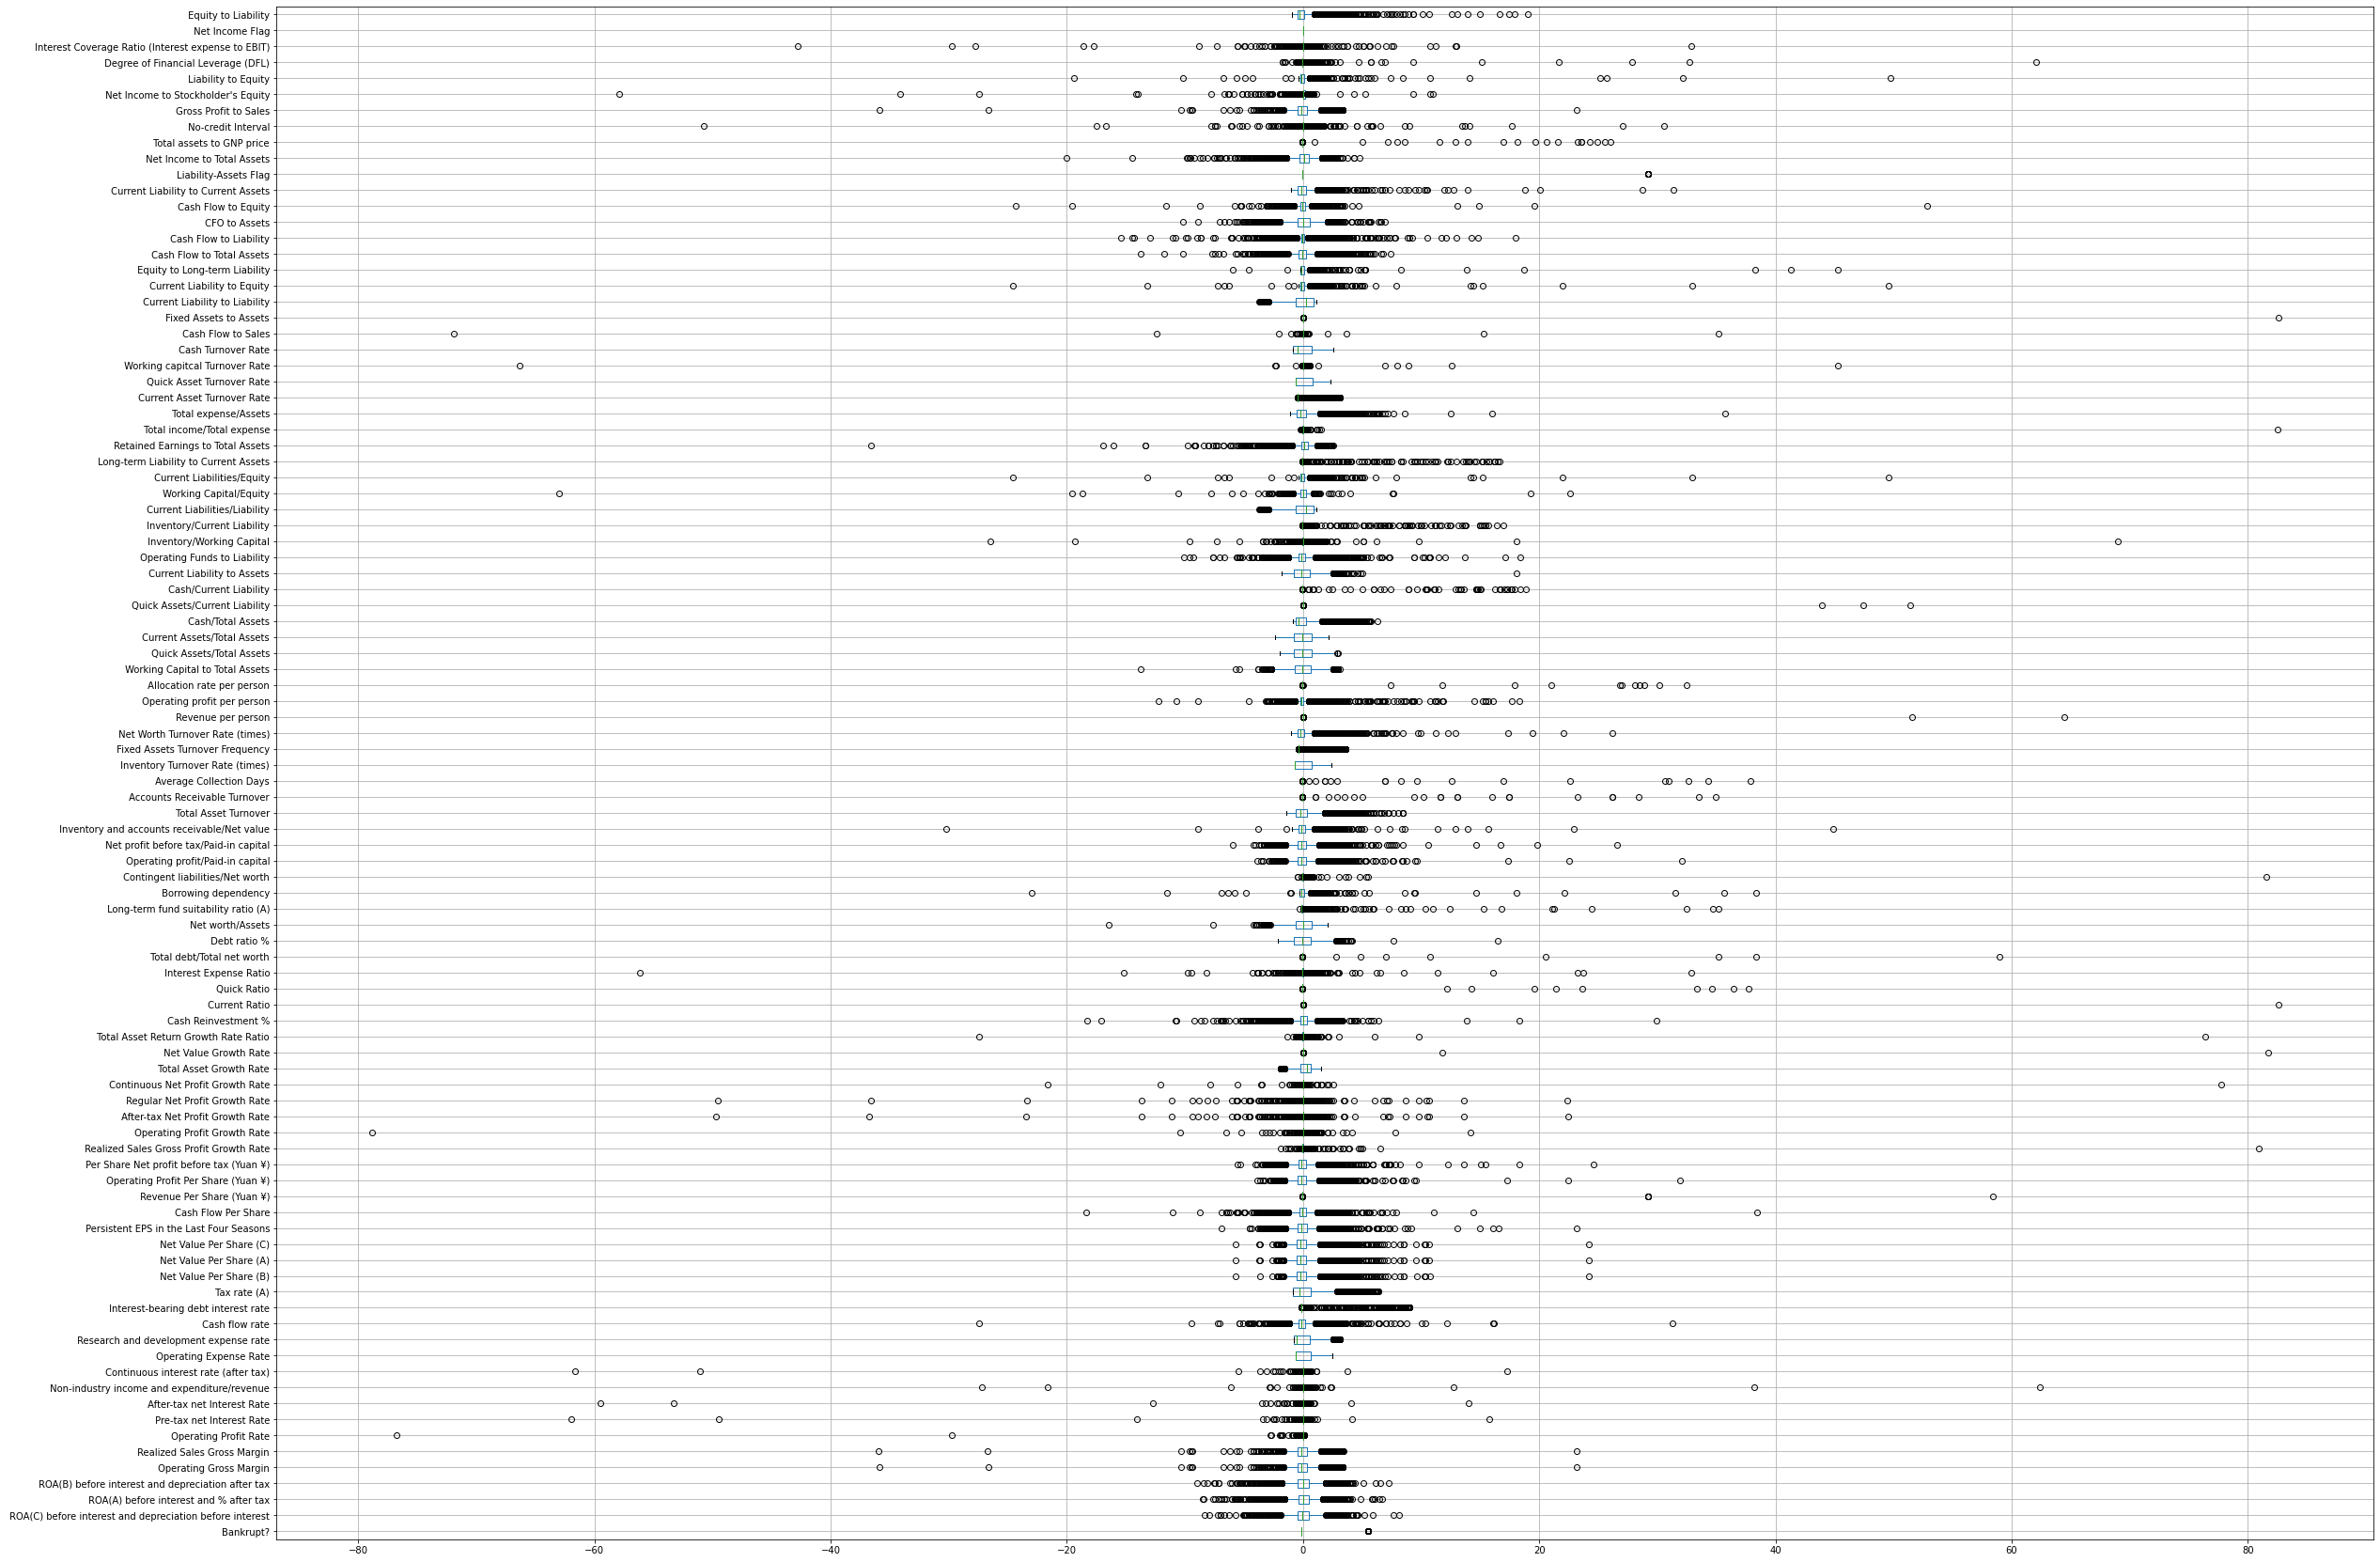

In [3]:
# Load the dataset
csvFile = INPUT_FILE
dataset = pd.read_csv(csvFile)

# Calculate key statistics from original dataset
original_row_amount = len(dataset.index)
original_features_amount = len(dataset.columns)

# Normalize the dataset using normal distribution
normal_scaler = StandardScaler()
dataset = pd.DataFrame(normal_scaler.fit_transform(dataset), columns=dataset.columns)

# Plot boxplot of the dataset
plt.rcParams["figure.figsize"] = (40,30)
dataset.boxplot(vert=False)
plt.show()

## Preprocess the dataset
- Remove features with extreme values
- Remove outliers based on certain percentage value

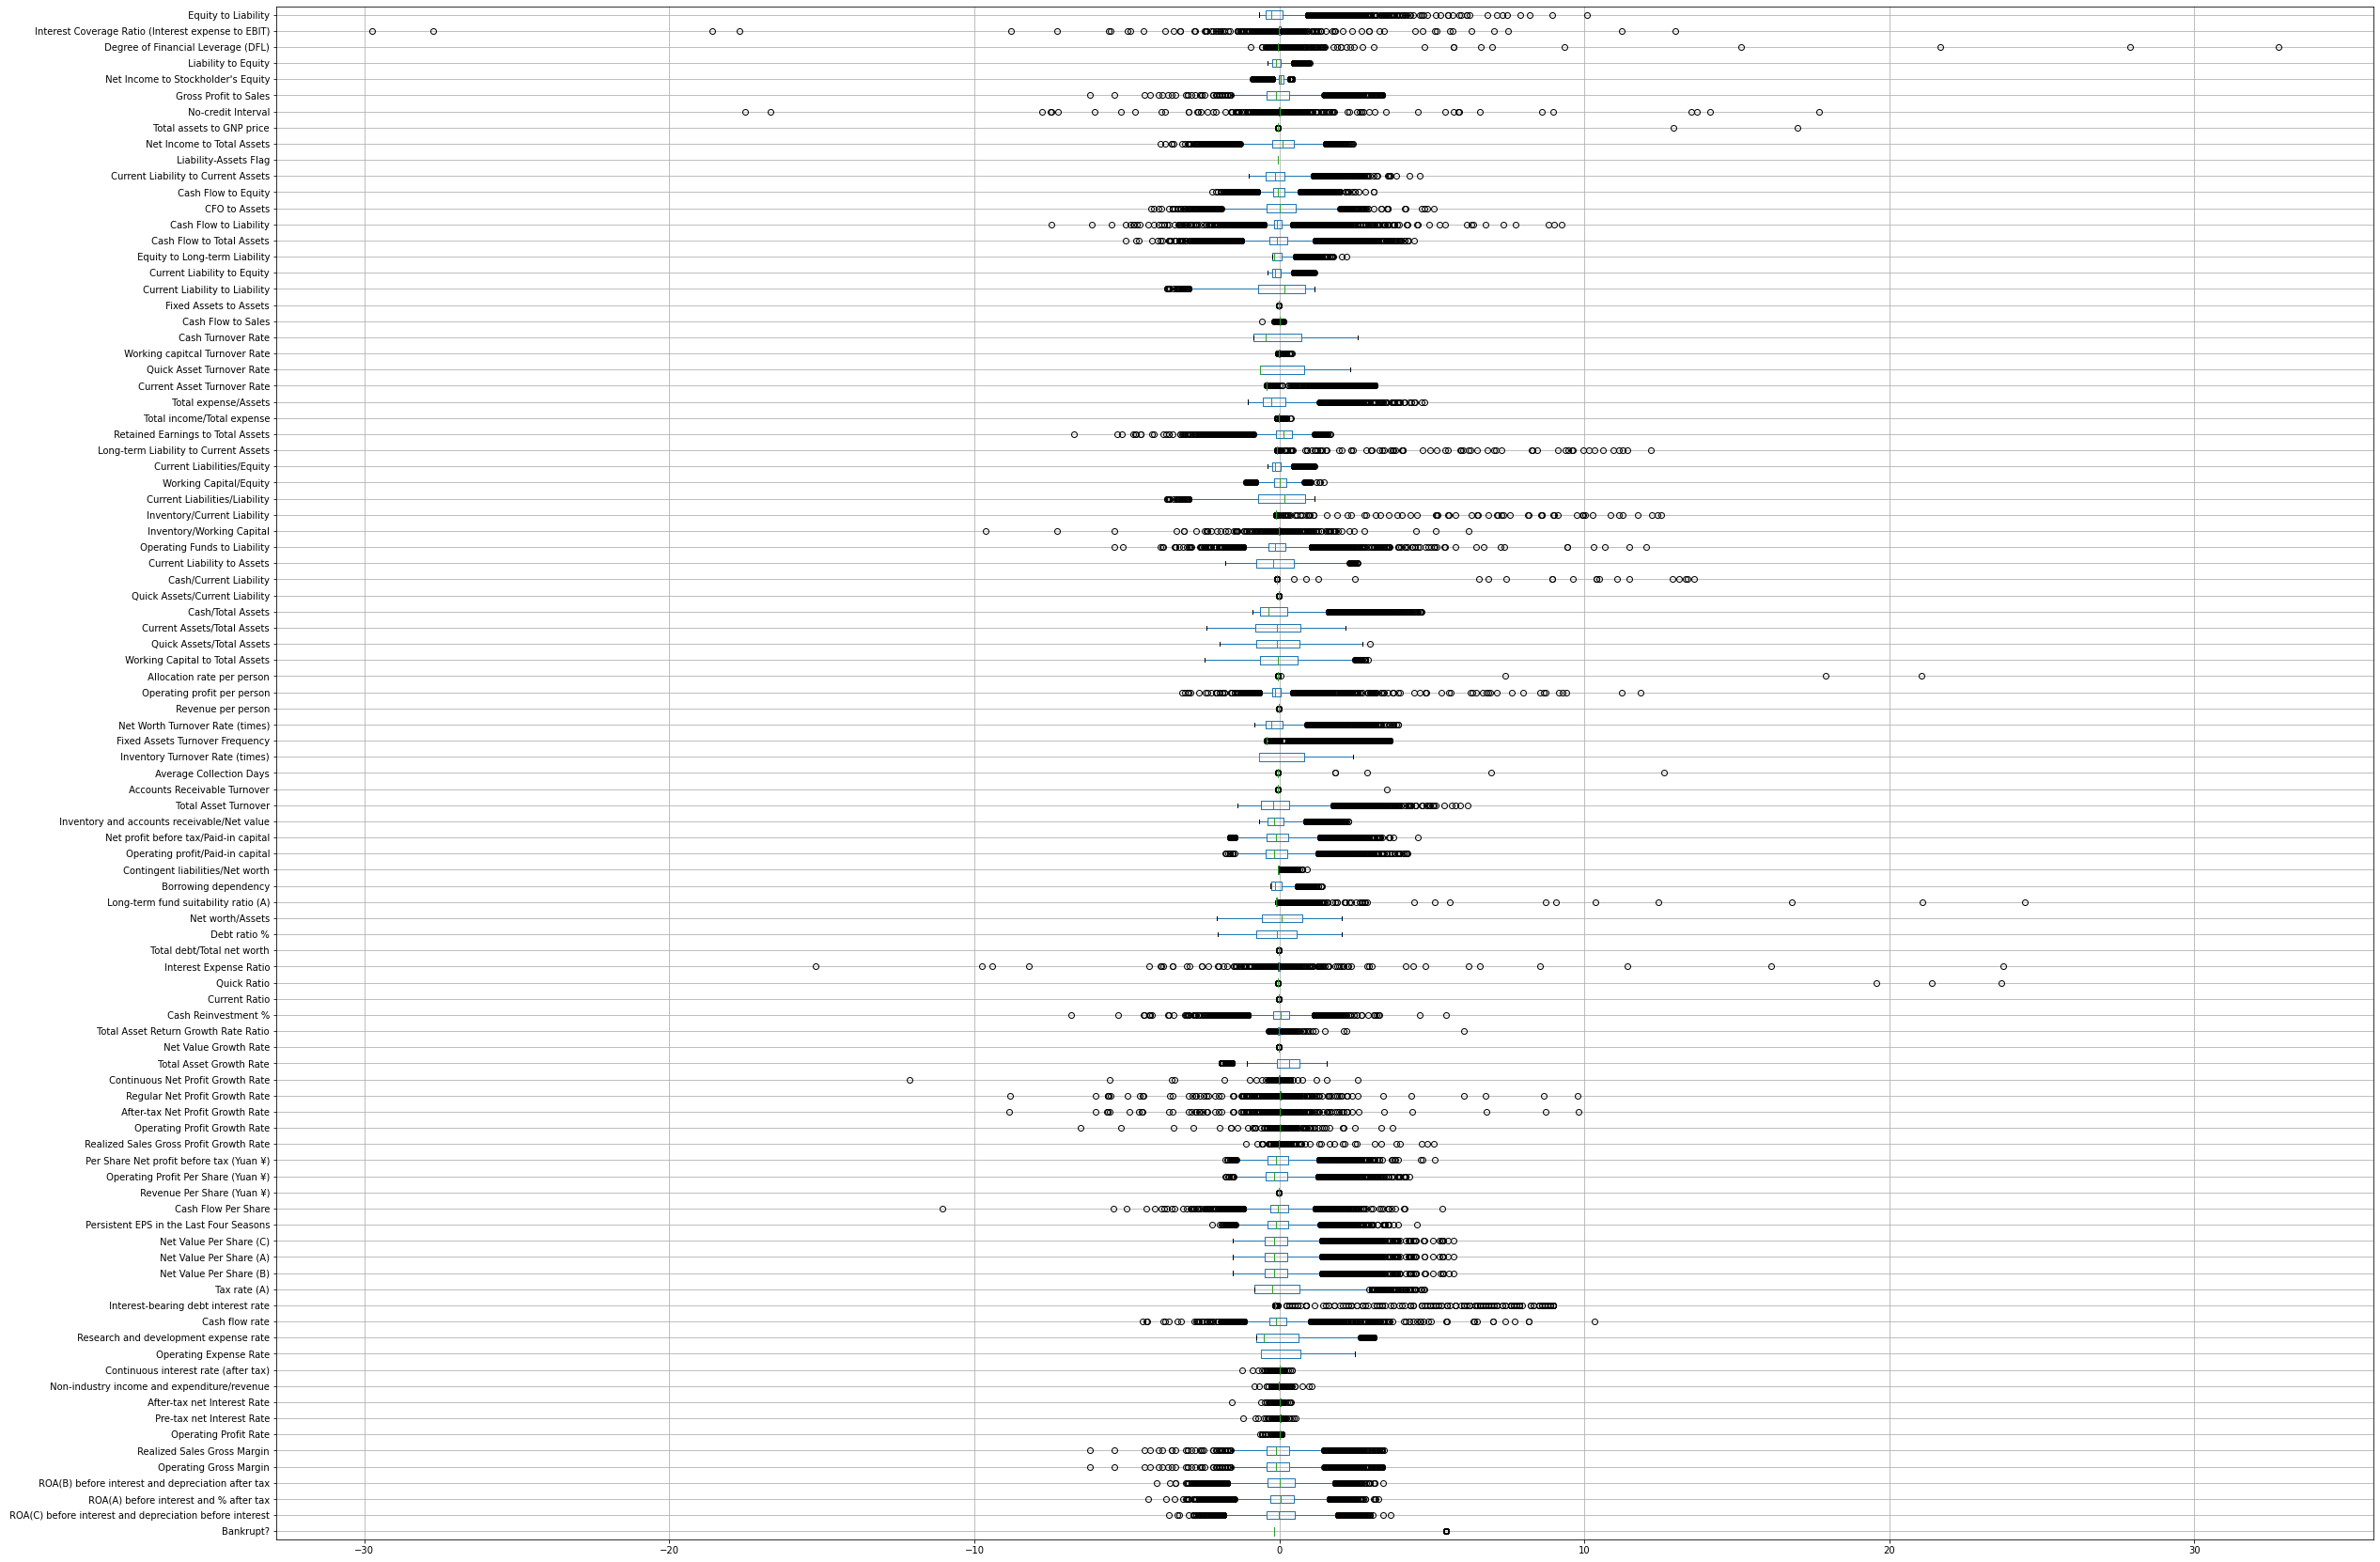

In [4]:
# Remove netincome flag, because it causes problems with heuristics
dataset = dataset.drop(columns=[" Net Income Flag"])

# Remove furthest x% from all columns unless columns still have high number of extreme values
# Remove columns that have high number of extreme values.
percentage_modifier = 1 - OUTLIER_CUT_PERCENTAGE
columns_to_be_removed = {}
for column in dataset.columns:
    lower_cut = dataset[column].min() * percentage_modifier
    upper_cut = dataset[column].max() * percentage_modifier
    if sum(dataset[column] < lower_cut) < LEAVE_OUT_TRESHOLD:
        dataset = dataset[dataset[column] > lower_cut]
    elif REMOVE_FEATURES:
        columns_to_be_removed[column] = True
    if sum(dataset[column] > upper_cut) < LEAVE_OUT_TRESHOLD:
        dataset = dataset[dataset[column] < upper_cut]
    elif REMOVE_FEATURES:
        columns_to_be_removed[column] = True

# Remove marked columns except Bankrupt? label column
if "Bankrupt?" in columns_to_be_removed:
    del columns_to_be_removed["Bankrupt?"]
dataset = dataset.drop(columns=columns_to_be_removed.keys())

# Show new results
dataset.boxplot(vert=False)
plt.show()

## Rebalance the data to get it ready for machine learning

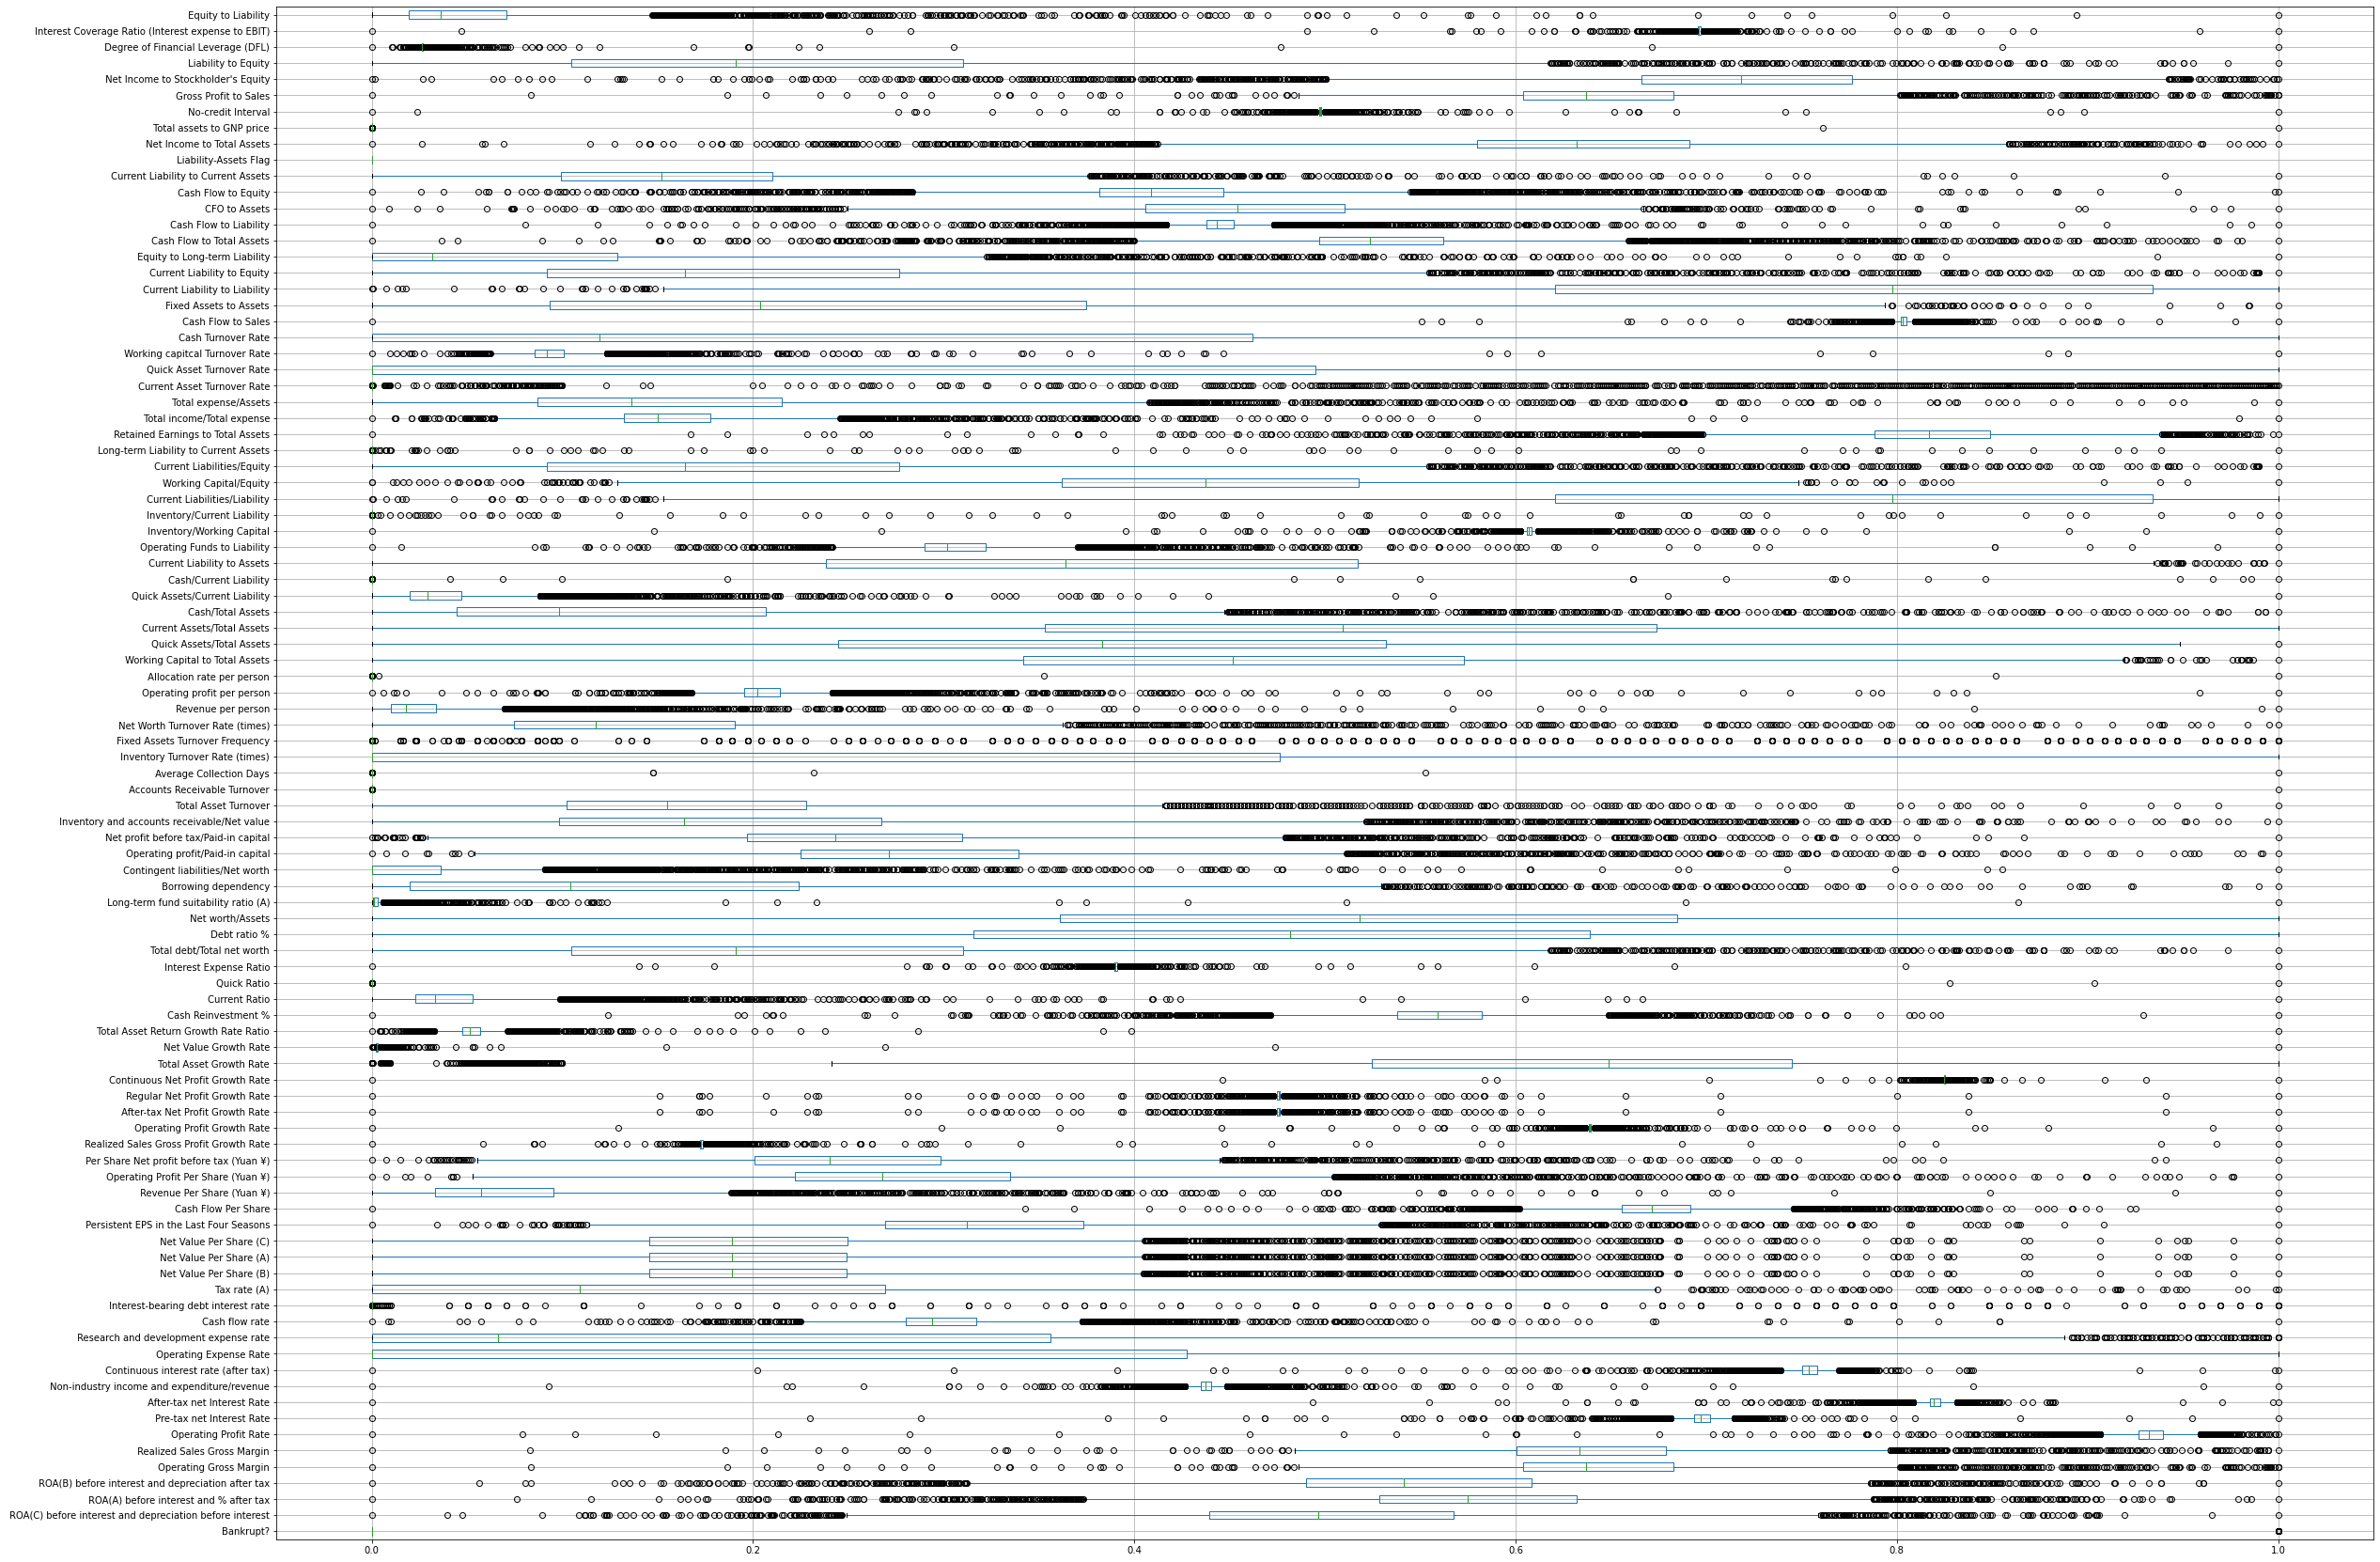

Data entries / rows left: 90.5705%
Features / columns left: 98.9583%


In [5]:
# Rebalance the data using standard scaler and min max scaler
standard_scaler = StandardScaler()
dataset = pd.DataFrame(standard_scaler.fit_transform(dataset), columns=dataset.columns)
min_max_scaler = MinMaxScaler()
dataset = pd.DataFrame(min_max_scaler.fit_transform(dataset), columns=dataset.columns)

# Resharp the label field
dataset.loc[dataset["Bankrupt?"] > 0.5, "Bankrupt?"] = 1
dataset.loc[dataset["Bankrupt?"] < 0.5, "Bankrupt?"] = 0

# Show final results
dataset.boxplot(vert=False)
plt.show()

# Show how many rows we still have left
print(f"Data entries / rows left: {round(len(dataset.index) / original_row_amount * 100, 4)}%")

# Show how many features we still have left
print(f"Features / columns left: {round(len(dataset.columns) / original_features_amount * 100, 4)}%")

## Save the preprocessed dataset

In [6]:
dataset.to_csv(OUTPUT_FILE, index=False, quoting=csv.QUOTE_ALL)